In [24]:
# Import files
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np

## Gradient Descent 

In [25]:
import numpy as np

# returns funkier function over a reasonable range of X, Y values to plot
def funkier(delta=0.01):
    delta = 0.01
    x1 = np.arange(-3.3, 3.3, delta)
    x2 = np.arange(-2.8, 2.8, delta)
    X1, X2 = np.meshgrid(x1, x2)
    Y1 = np.exp(-X1**2 - X2**2) # centered at (0,0)
    Y2 = np.exp(-(X1 - 1)**2 - (X2 - 1)**2) # centered at (1,1)
    Y3 = np.exp(-(X1 + 1)**2 - (X2 + 1)**2) # centered at (-1,-1)
    Y = Y1 - Y2 - 0.7*Y3
    return X1, X2, Y

# given X and Y, returns Z
# X and Y can be arrays or single values...numpy will handle it!
def funkier_z(X1, X2):
    Z1 = np.exp(-X1**2 - X2**2)
    Z2 = np.exp(-(X1 - 1)**2 - (X2 - 1)**2)
    Z3 = np.exp(-(X1 + 1)**2 - (X2 + 1)**2)
    Y = Z1 - Z2 - 0.7*Z3
    return Y

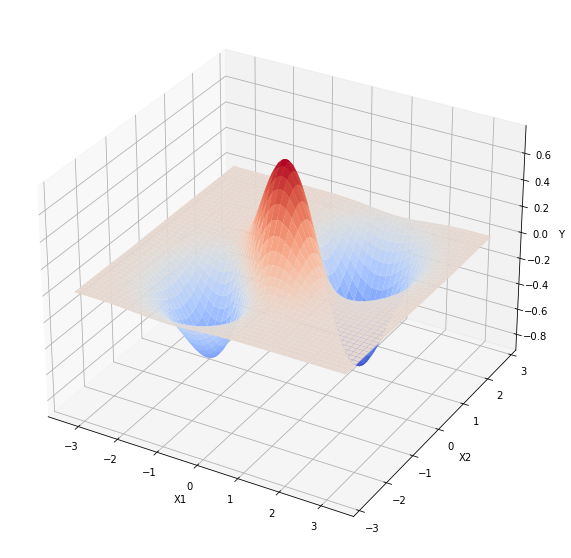

In [26]:
X1, X2, Y = funkier()

# Setting the figure size and 3D projection
ax = plt.figure(figsize=(12,10)).gca(projection='3d')

# Creating labels for the axes
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Y')
_ = ax.plot_surface(X1, X2, Y, cmap=cm.coolwarm)

Below is the gradient function. For a particular $x_1$ and $x_2$, we return $\frac{\partial \text{funkier}}{\partial x_1}$ and $\frac{\partial \text{funkier}}{\partial x_2}$. 

In [27]:
def funkier_grad(x1, x2):

    # Compute 
    # dY / dx1
    # dY / dx2

    # where Y is defined as 
    #Y1 = np.exp(-X1**2 - X2**2) # centered at (0,0)
    #Y2 = np.exp(-(X1 - 1)**2 - (X2 - 1)**2) # centered at (1,1)
    #Y3 = np.exp(-(X1 + 1)**2 - (X2 + 1)**2) # centered at (-1,-1)
    #Y = Y1 - Y2 - 0.7*Y3

    t1 = -(x1**2 + x2**2)
    t2 = -(x1-1)**2 - (x2-1)**2
    t3 = -(x1+1)**2 - (x2+1)**2
    x1_grad = -2 * x1 * np.exp(t1) + 2 * (x1-1) * np.exp(t2) \
              +2 * 0.7 * (x1+1) * np.exp(t3)
    
    x2_grad = -2 * x2 * np.exp(t1) + 2 * (x2-1) * np.exp(t2) \
              +2 * 0.7 * (x2+1) * np.exp(t3)
    
    return x1_grad, x2_grad

We next implement gradient descent in order to find the minmum of **funkier**.

In [28]:
def funkier_minimize(x1_0, x2_0, eta, max_iter):
    """
    x1_0: x1 point that we start at
    x2_0: x2 point that we start at
    eta: Learning rate
    """
    # x1 and x2 are trajectories
    x1 = np.zeros(max_iter + 1)
    x2 = np.zeros(max_iter + 1)

    # x1[i] - ith point in the trajectory
    
    x1[0] = x1_0
    x2[0] = x2_0
    print('\n Using starting point: ', x1[0], x2[0])
    
    for i in range(max_iter):
        
        # Print current co-ordinates
        print('{0:2d}: x1={1:6.3f} x2={2:6.3f} y={3:6.3f}'.format(i, x1[i], x2[i],
                                                                   funkier_z(x1[i], x2[i])))
        ################
        # Your code below
        ################
        # use funkier_grad (x[i]) to get gradients
        # x[i+1] some function of x[i], gradients
        dx1, dx2 = funkier_grad(x1[i], x2[i])
        x1[i+1] = x1[i] - eta * dx1
        x2[i+1] = x2[i] - eta * dx2

        ### What does below condition represent?
        # x1[i+1] - x1[i] = eta * dx1 [previous equation]
        if (abs(x1[i+1] - x1[i]) < 1e-6) and ((abs(x2[i+1] - x2[i]) < 1e-6)):
            return x1[:i+2], x2[:i+2]
        
        if abs(x1[i+1]) > 100:
            print('diverging?')
            return x1[:i+2], x2[:i+2]
    return x1, x2

In [29]:
def plot_3D(x1s, x2s, ys):
    ax = plt.figure(figsize=(12,10)).gca(projection='3d')
    ax.set_xlabel('Feature 1')
    ax.set_ylabel('Feature 2')
    ax.set_zlabel('Y')
    elev=ax.elev
    azim=ax.azim
    ax.view_init(elev= elev, azim = azim)
    _ = ax.plot_surface(X1, X2, Y, cmap=cm.coolwarm, alpha=0.5)
    ax.plot(x1s, x2s, ys, color='orange', markerfacecolor='black', markeredgecolor='k', marker='o', markersize=5)

In [30]:
def plot_trajectory(x1_0, x2_0, eta, max_iter):    
    x1_opt, x2_opt = funkier_minimize(x1_0, x2_0, eta, max_iter)
    y_opt = funkier_z(x1_opt, x2_opt)
    plot_3D(x1_opt, x2_opt, y_opt)


 Using starting point:  0.05 0.05
 0: x1= 0.050 x2= 0.050 y= 0.753
 1: x1= 0.075 x2= 0.075 y= 0.739
 2: x1= 0.108 x2= 0.108 y= 0.713
 3: x1= 0.153 x2= 0.153 y= 0.668
 4: x1= 0.211 x2= 0.211 y= 0.590
 5: x1= 0.286 x2= 0.286 y= 0.464
 6: x1= 0.379 x2= 0.379 y= 0.272
 7: x1= 0.489 x2= 0.489 y= 0.018
 8: x1= 0.608 x2= 0.608 y=-0.261
 9: x1= 0.722 x2= 0.722 y=-0.506
10: x1= 0.820 x2= 0.820 y=-0.678
11: x1= 0.896 x2= 0.896 y=-0.779
12: x1= 0.952 x2= 0.952 y=-0.833
13: x1= 0.993 x2= 0.993 y=-0.861
14: x1= 1.022 x2= 1.022 y=-0.875
15: x1= 1.043 x2= 1.043 y=-0.883
16: x1= 1.058 x2= 1.058 y=-0.887
17: x1= 1.069 x2= 1.069 y=-0.889
18: x1= 1.077 x2= 1.077 y=-0.890
19: x1= 1.083 x2= 1.083 y=-0.891
20: x1= 1.087 x2= 1.087 y=-0.891
21: x1= 1.090 x2= 1.090 y=-0.891
22: x1= 1.093 x2= 1.093 y=-0.891
23: x1= 1.095 x2= 1.095 y=-0.891
24: x1= 1.096 x2= 1.096 y=-0.891
25: x1= 1.097 x2= 1.097 y=-0.891
26: x1= 1.098 x2= 1.098 y=-0.891
27: x1= 1.098 x2= 1.098 y=-0.891
28: x1= 1.099 x2= 1.099 y=-0.891
29: x1= 

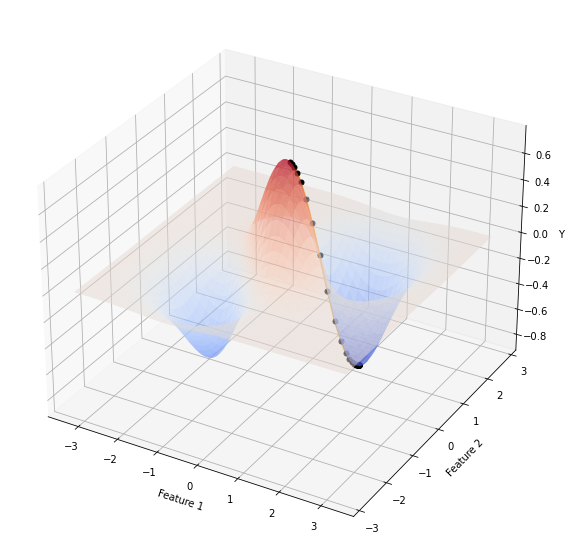

In [31]:
max_iter = 50
eta = 0.1
x1_0 = 0.05
x2_0 = 0.05

plot_trajectory(x1_0, x2_0, eta, max_iter)

Now run the same code but with 

1. A starting point of (-0.05, 0.05) 
2. A learning rate of 1.5


 Using starting point:  -0.05 0.05
 0: x1=-0.050 x2= 0.050 y= 0.766
 1: x1=-0.044 x2= 0.286 y= 0.664
 2: x1= 0.315 x2= 1.301 y=-0.405
 3: x1= 1.643 x2= 1.431 y=-0.540
 4: x1= 0.627 x2= 0.758 y=-0.443
 5: x1= 2.249 x2= 2.206 y=-0.049
 6: x1= 2.066 x2= 2.029 y=-0.111
 7: x1= 1.710 x2= 1.686 y=-0.374
 8: x1= 0.923 x2= 0.926 y=-0.808
 9: x1= 1.651 x2= 1.646 y=-0.427
10: x1= 0.831 x2= 0.832 y=-0.694
11: x1= 1.932 x2= 1.930 y=-0.176
12: x1= 1.441 x2= 1.441 y=-0.662
13: x1= 0.612 x2= 0.613 y=-0.272
14: x1= 2.323 x2= 2.323 y=-0.030
15: x1= 2.203 x2= 2.203 y=-0.055
16: x1= 2.003 x2= 2.003 y=-0.133
17: x1= 1.603 x2= 1.603 y=-0.477
18: x1= 0.757 x2= 0.757 y=-0.572
19: x1= 2.119 x2= 2.119 y=-0.082
20: x1= 1.845 x2= 1.845 y=-0.239
21: x1= 1.244 x2= 1.244 y=-0.843
22: x1= 0.763 x2= 0.763 y=-0.584
23: x1= 2.105 x2= 2.105 y=-0.087
24: x1= 1.817 x2= 1.817 y=-0.262
25: x1= 1.179 x2= 1.179 y=-0.876
26: x1= 0.893 x2= 0.893 y=-0.775
27: x1= 1.746 x2= 1.746 y=-0.326
28: x1= 1.022 x2= 1.022 y=-0.876
29: x1=

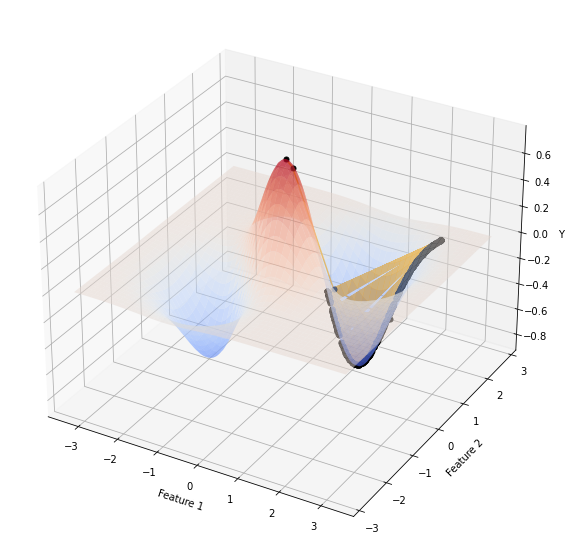

In [32]:
max_iter =500
eta = 1.5
x1_0 = -0.05
x2_0 = 0.05

plot_trajectory(x1_0, x2_0, eta, max_iter)


 Using starting point:  0.05 0.05
 0: x1= 0.050 x2= 0.050 y= 0.753
 1: x1= 0.425 x2= 0.425 y= 0.169
 2: x1= 2.152 x2= 2.152 y=-0.070
 3: x1= 1.910 x2= 1.910 y=-0.190
 4: x1= 1.392 x2= 1.392 y=-0.715
 5: x1= 0.614 x2= 0.614 y=-0.275
 6: x1= 2.322 x2= 2.322 y=-0.030
 7: x1= 2.202 x2= 2.202 y=-0.056
 8: x1= 2.001 x2= 2.001 y=-0.134
 9: x1= 1.599 x2= 1.599 y=-0.482
10: x1= 0.750 x2= 0.750 y=-0.560
11: x1= 2.133 x2= 2.133 y=-0.077
12: x1= 1.873 x2= 1.873 y=-0.217
13: x1= 1.309 x2= 1.309 y=-0.794
14: x1= 0.671 x2= 0.671 y=-0.401
15: x1= 2.271 x2= 2.271 y=-0.040
16: x1= 2.120 x2= 2.120 y=-0.081
17: x1= 1.848 x2= 1.848 y=-0.236
18: x1= 1.250 x2= 1.250 y=-0.839
19: x1= 0.753 x2= 0.753 y=-0.564
20: x1= 2.129 x2= 2.129 y=-0.078
21: x1= 1.865 x2= 1.865 y=-0.223
22: x1= 1.288 x2= 1.288 y=-0.811
23: x1= 0.695 x2= 0.695 y=-0.452
24: x1= 2.236 x2= 2.236 y=-0.047
25: x1= 2.062 x2= 2.062 y=-0.104
26: x1= 1.730 x2= 1.730 y=-0.342
27: x1= 0.988 x2= 0.988 y=-0.858
28: x1= 1.442 x2= 1.442 y=-0.661
29: x1= 

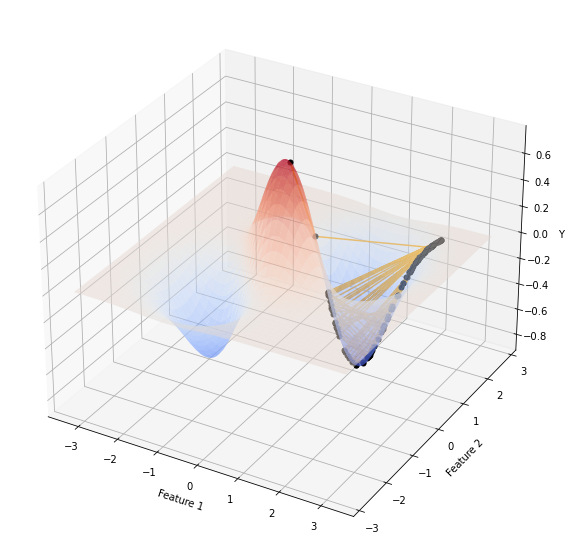

In [33]:
## Code here
max_iter = 100
eta = 1.5
x1_0 = 0.05
x2_0 = 0.05

plot_trajectory(x1_0, x2_0, eta, max_iter)